# 📚 Introducción a Python para procesamiento de datos geoespaciales

> Colvert Gomez Rubio - Octubre 2025

# Descarga de imágenes usando [planetary-computer](https://planetarycomputer.microsoft.com/)

In [1]:
# pip install pystac-client planetary-computer

In [2]:
import pystac_client
import planetary_computer
from datetime import datetime

In [3]:
# # Conectar a Microsoft Planetary Computer (no requiere credenciales)
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)


In [4]:
# # Buscar escenas Landsat 8-9
search = catalog.search(
    collections=["landsat-c2-l2"],  # Landsat Collection 2 Level 2
    bbox=[-98.9, 18.8, -98.4, 19.5],  # Izta-Popo
    datetime="2025-01-01/2025-12-31",
    query={"eo:cloud_cover": {"lt": 100}}  # Máximo 100% de nubes
)

In [5]:
# Obtener todas las escenas encontradas
items = list(search.items())
len(items)

103

In [6]:
# Mostrar información de las primeras 5 escenas
items[:5]

[<Item id=LC09_L2SP_026047_20251004_02_T1>,
 <Item id=LC09_L2SP_026046_20251004_02_T1>,
 <Item id=LC09_L2SP_025047_20250927_02_T1>,
 <Item id=LC08_L2SP_026047_20250926_02_T1>,
 <Item id=LC08_L2SP_026046_20250926_02_T1>]

In [7]:
# primer item
item_0 = items[0]
item_0

<Item id=LC09_L2SP_026047_20251004_02_T1>

In [8]:
item_0.datetime

datetime.datetime(2025, 10, 4, 17, 0, 17, 535650, tzinfo=tzutc())

In [9]:
item_0.geometry

{'type': 'Polygon',
 'coordinates': [[[-99.78727423827206, 19.82623699153034],
   [-100.17836039079722, 18.094283444889708],
   [-98.46354463005342, 17.736505114829477],
   [-98.0579173297434, 19.471452989709537],
   [-99.78727423827206, 19.82623699153034]]]}

In [10]:
item_0.properties

{'gsd': 30,
 'created': '2025-10-08T09:26:30.550444Z',
 'sci:doi': '10.5066/P9OGBGM6',
 'datetime': '2025-10-04T17:00:17.535650Z',
 'platform': 'landsat-9',
 'proj:shape': [7761, 7601],
 'description': 'Landsat Collection 2 Level-2',
 'instruments': ['oli', 'tirs'],
 'eo:cloud_cover': 51.95,
 'proj:transform': [30.0, 0.0, 372885.0, 0.0, -30.0, 2193315.0],
 'view:off_nadir': 0,
 'landsat:wrs_row': '047',
 'landsat:scene_id': 'LC90260472025277LGN00',
 'landsat:wrs_path': '026',
 'landsat:wrs_type': '2',
 'view:sun_azimuth': 136.20319145,
 'landsat:correction': 'L2SP',
 'view:sun_elevation': 58.62064915,
 'landsat:cloud_cover_land': 51.95,
 'landsat:collection_number': '02',
 'landsat:collection_category': 'T1',
 'proj:code': 'EPSG:32614'}

In [11]:
# # Ver TODAS las bandas y assets disponibles
print(f"Todos los assets disponibles para {item_0.id}:\n")
for key, asset in item_0.assets.items():
    print(f"  - {key:20s}: {asset.title}")

Todos los assets disponibles para LC09_L2SP_026047_20251004_02_T1:

  - qa                  : Surface Temperature Quality Assessment Band
  - ang                 : Angle Coefficients File
  - red                 : Red Band
  - blue                : Blue Band
  - drad                : Downwelled Radiance Band
  - emis                : Emissivity Band
  - emsd                : Emissivity Standard Deviation Band
  - trad                : Thermal Radiance Band
  - urad                : Upwelled Radiance Band
  - atran               : Atmospheric Transmittance Band
  - cdist               : Cloud Distance Band
  - green               : Green Band
  - nir08               : Near Infrared Band 0.8
  - lwir11              : Surface Temperature Band
  - swir16              : Short-wave Infrared Band 1.6
  - swir22              : Short-wave Infrared Band 2.2
  - coastal             : Coastal/Aerosol Band
  - mtl.txt             : Product Metadata File (txt)
  - mtl.xml             : Product Metad

In [12]:
# # Ver las bandas disponibles
item = items[0]
print(f"Bandas disponibles para {item.id}:")
for key, asset in item.assets.items():
    if 'eo:bands' in asset.extra_fields:
        print(f"  - {key}: {asset.title}")

Bandas disponibles para LC09_L2SP_026047_20251004_02_T1:
  - red: Red Band
  - blue: Blue Band
  - green: Green Band
  - nir08: Near Infrared Band 0.8
  - lwir11: Surface Temperature Band
  - swir16: Short-wave Infrared Band 1.6
  - swir22: Short-wave Infrared Band 2.2
  - coastal: Coastal/Aerosol Band


In [13]:
item_0.id

'LC09_L2SP_026047_20251004_02_T1'

In [14]:
# Convertir a GeoDataFrame para tener funcionalidades geoespaciales
import geopandas as gpd
from shapely.geometry import shape

lista_escenas = []
for item in items:
    info = {"id":item.id, 'geometry': shape(item.geometry)}
    for key, value in item.properties.items():
        info[key] = value
    lista_escenas.append(info)

gdf = gpd.GeoDataFrame(lista_escenas, crs = 'EPSG:4326')
gdf.head()

,id,geometry,gsd,created,sci:doi,datetime,platform,proj:shape,description,instruments,...,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category,proj:code
0,LC09_L2SP_026047_20251004_02_T1,"POLYGON ((-99.78727 19.82624, -100.17836 18.09...",30,2025-10-08T09:26:30.550444Z,10.5066/P9OGBGM6,2025-10-04T17:00:17.535650Z,landsat-9,"[7761, 7601]",Landsat Collection 2 Level-2,"[oli, tirs]",...,LC90260472025277LGN00,026,2,136.203191,L2SP,58.620649,51.95,02,T1,EPSG:32614
1,LC09_L2SP_026046_20251004_02_T1,"POLYGON ((-99.46273 21.26923, -99.85249 19.536...",30,2025-10-08T09:26:29.340787Z,10.5066/P9OGBGM6,2025-10-04T16:59:53.636163Z,landsat-9,"[7751, 7601]",Landsat Collection 2 Level-2,"[oli, tirs]",...,LC90260462025277LGN00,026,2,138.120495,L2SP,57.712492,49.11,02,T1,EPSG:32614
2,LC09_L2SP_025047_20250927_02_T1,"POLYGON ((-98.24777 19.82639, -98.63797 18.094...",30,2025-10-02T09:20:23.381761Z,10.5066/P9OGBGM6,2025-09-27T16:54:06.614234Z,landsat-9,"[7711, 7561]",Landsat Collection 2 Level-2,"[oli, tirs]",...,LC90250472025270LGN00,025,2,131.745002,L2SP,60.216227,28.09,02,T1,EPSG:32614
3,LC08_L2SP_026047_20250926_02_T1,"POLYGON ((-99.79474 19.82891, -100.18575 18.09...",30,2025-10-05T09:20:46.826712Z,10.5066/P9OGBGM6,2025-09-26T17:00:14.812341Z,landsat-8,"[7761, 7611]",Landsat Collection 2 Level-2,"[oli, tirs]",...,LC80260472025269LGN00,026,2,131.059268,L2SP,60.424213,41.10,02,T1,EPSG:32614
4,LC08_L2SP_026046_20250926_02_T1,"POLYGON ((-99.46997 21.27165, -99.85965 19.538...",30,2025-10-05T09:20:45.654541Z,10.5066/P9OGBGM6,2025-09-26T16:59:50.917065Z,landsat-8,"[7761, 7601]",Landsat Collection 2 Level-2,"[oli, tirs]",...,LC80260462025269LGN00,026,2,133.246413,L2SP,59.619292,41.72,02,T1,EPSG:32614


In [15]:
# Obtener factores de escala desde los metadatos del item
item = items[68]

green_asset = item.assets['green']

In [16]:
green_band_info = green_asset.extra_fields['raster:bands'][0]
green_scale = green_band_info.get('scale')
green_offset = green_band_info.get('offset')

green_scale, green_offset

(2.75e-05, -0.2)

In [17]:
# Obtener la URL del asset de la banda verde
green_band_url = item.assets["green"].href
green_band_url

'https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2025/025/047/LC09_L2SP_025047_20250404_20250405_02_T1/LC09_L2SP_025047_20250404_20250405_02_T1_SR_B3.TIF?st=2025-10-09T16%3A26%3A46Z&se=2025-10-10T17%3A11%3A46Z&sp=rl&sv=2025-07-05&sr=c&skoid=9c8ff44a-6a2c-4dfb-b298-1c9212f64d9a&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2025-10-10T02%3A41%3A15Z&ske=2025-10-17T02%3A41%3A15Z&sks=b&skv=2025-07-05&sig=E7r7mmDbSUQRhzv8MlgHt34To0dl/iiobcA2KtaDNr8%3D'

# RIOXARRAY

In [18]:
import rioxarray
import matplotlib.pyplot as plt

https://tutorial.xarray.dev/fundamentals/01_data_structures.html

In [19]:
green_rxr = rioxarray.open_rasterio(green_band_url)

In [20]:
green_rxr

<xarray.DataArray (band: 1, y: 7711, x: 7561)> Size: 117MB
[58302871 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 62kB 2.193e+06 2.193e+06 ... 1.962e+06 1.962e+06
  * x            (x) float64 60kB 5.361e+05 5.361e+05 ... 7.629e+05 7.629e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

In [ ]:
# plot la banda
# green_rxr.plot()

In [21]:
# Ver su sistema de referencia
green_rxr.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 14N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-99],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32614"]]')

In [22]:
# Obtener los valores como un array de numpy
green_data = green_rxr.values[:]
green_data.shape

(1, 7711, 7561)

In [24]:
green_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], shape=(1, 7711, 7561), dtype=uint16)

In [25]:
# Hacer nan los ceros de mi rioxarray 
green_rxr = green_rxr.where(green_rxr != 0)
green_rxr

<xarray.DataArray (band: 1, y: 7711, x: 7561)> Size: 233MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(1, 7711, 7561), dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 62kB 2.193e+06 2.193e+06 ... 1.962e+06 1.962e+06
  * x            (x) float64 60kB 5.361e+05 5.361e+05 ... 7.629e+05 7.629e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

In [26]:
# Reescalar mi rioxarray
green_rxr_rscal = green_rxr * green_scale + green_offset
green_rxr_rscal

<xarray.DataArray (band: 1, y: 7711, x: 7561)> Size: 233MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(1, 7711, 7561), dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 62kB 2.193e+06 2.193e+06 ... 1.962e+06 1.962e+06
  * x            (x) float64 60kB 5.361e+05 5.361e+05 ... 7.629e+05 7.629e+05
    spatial_ref  int64 8B 0

In [27]:
# Ver minimo y maximo de la banda reescalada
green_rxr_rscal.min(), green_rxr_rscal.max()

(<xarray.DataArray ()> Size: 4B
 array(-0.14912501, dtype=float32)
 Coordinates:
     spatial_ref  int64 8B 0,
 <xarray.DataArray ()> Size: 4B
 array(1.34429, dtype=float32)
 Coordinates:
     spatial_ref  int64 8B 0)

In [28]:
# Exportar la banda reescalada a GeoTIFF
green_rxr_rscal.rio.to_raster('gree_band_rscaled.tif')

In [32]:
def get_rescaled_band(item, band):
    """
    Obtiene y reescala una banda de una imagen Landsat.
    
    Esta función descarga una banda específica de un item STAC de Landsat,
    aplica los factores de escala y offset correspondientes, y convierte
    los valores cero a NaN para eliminar píxeles sin datos.
    
    Parámetros
    ----------
    item : pystac.Item
        Item STAC que contiene la imagen Landsat con sus bandas y metadatos.
    band : str
        Nombre de la banda a procesar (ej: 'red', 'green', 'nir08', 'blue').
    
    Retorna
    -------
    rioxarray.DataArray
        Array rasterizado con los valores de reflectancia reescalados,
        donde los ceros han sido convertidos a NaN.
    
    Ejemplo
    -------
    >>> red_band = get_rescaled_band(item, 'red')
    >>> nir_band = get_rescaled_band(item, 'nir08')
    """
    # Obtener el asset (archivo) correspondiente a la banda solicitada del item STAC
    band_asset = item.assets[band]
    
    # Extraer la información de metadatos de la banda desde los campos adicionales del asset
    band_info = band_asset.extra_fields['raster:bands'][0]
    
    # Obtener el factor de escala desde los metadatos (para convertir valores digitales a reflectancia)
    scale = band_info.get('scale')
    
    # Obtener el offset desde los metadatos (valor de corrección a sumar después de escalar)
    offset = band_info.get('offset')
    
    # Obtener la URL donde se encuentra almacenado el archivo raster de la banda
    band_url = band_asset.href

    # Abrir el archivo raster desde la URL usando rioxarray
    band_rxr = rioxarray.open_rasterio(band_url)
    
    # Convertir todos los valores cero a NaN (eliminar píxeles sin datos o de relleno)
    band_rxr = band_rxr.where(band_rxr != 0)
    
    # Aplicar la transformación: multiplicar por el factor de escala y sumar el offset
    band_rxr_rscaled = band_rxr * scale + offset

    # Retornar el array con los valores de reflectancia reescalados
    return band_rxr_rscaled

    

In [33]:
# Obtener bandas red y nir reescaladas
red_rxr_rscal = get_rescaled_band(item, 'red')
nir_rxr_rscal = get_rescaled_band(item, 'nir08')

In [34]:
# Ver minimo y maximo
red_rxr_rscal.min(), red_rxr_rscal.max()

(<xarray.DataArray ()> Size: 4B
 array(-0.1406, dtype=float32)
 Coordinates:
     spatial_ref  int64 8B 0,
 <xarray.DataArray ()> Size: 4B
 array(1.3346375, dtype=float32)
 Coordinates:
     spatial_ref  int64 8B 0)

In [35]:
nir_rxr_rscal.min(), nir_rxr_rscal.max()

(<xarray.DataArray ()> Size: 4B
 array(-0.0229, dtype=float32)
 Coordinates:
     spatial_ref  int64 8B 0,
 <xarray.DataArray ()> Size: 4B
 array(1.3277074, dtype=float32)
 Coordinates:
     spatial_ref  int64 8B 0)

In [36]:
ndvi = (nir_rxr_rscal - red_rxr_rscal) / (nir_rxr_rscal + red_rxr_rscal)
ndvi

<xarray.DataArray (band: 1, y: 7711, x: 7561)> Size: 233MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(1, 7711, 7561), dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 62kB 2.193e+06 2.193e+06 ... 1.962e+06 1.962e+06
  * x            (x) float64 60kB 5.361e+05 5.361e+05 ... 7.629e+05 7.629e+05
    spatial_ref  int64 8B 0

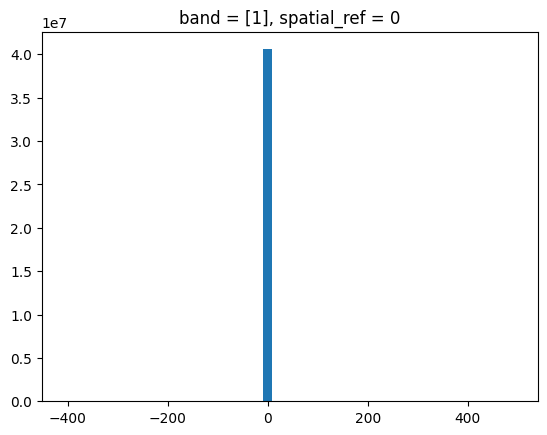

In [40]:
# Historgrama de NDVI
plt.figure()
ndvi.plot.hist(bins = 50)
plt.show()

In [44]:
# Filtrar ndvi a valores validos
ndvi = ndvi.where((ndvi >= 0) & (ndvi <= 1))

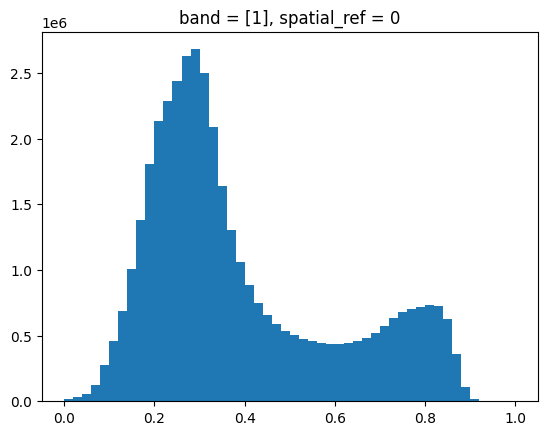

In [45]:
# Histograma de NDVI corr
plt.figure()
ndvi.plot.hist(bins = 50)
plt.show()

In [46]:
ndvi.rio.to_raster('ndvi.tif')

In [ ]:
# Siguiente misión: Usar la variable de '- qa_pixel : Pixel Quality Assessment Band' para hacer el filtro de píxeles anómalos......

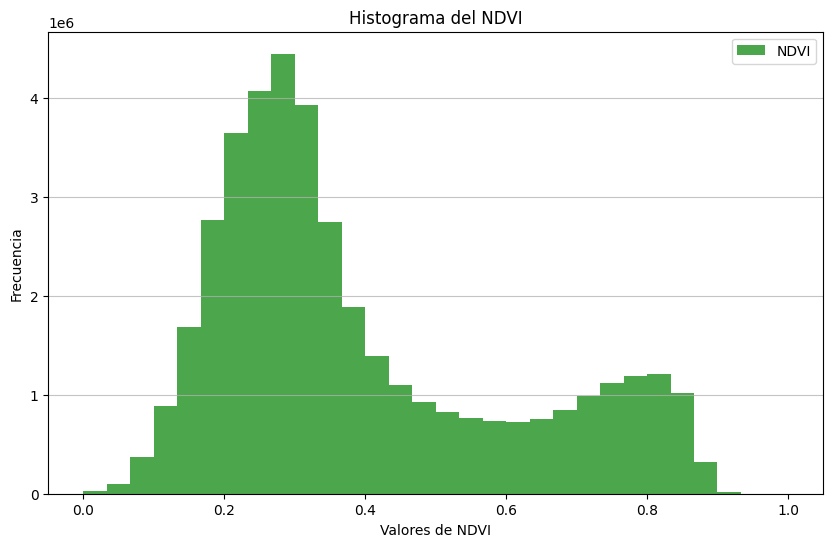

In [49]:
# Un plot del histograma del NDVI mejorado con titulo y nombres de ejes:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ndvi.plot.hist(bins=30, color='green', alpha=0.7)
plt.title('Histograma del NDVI')
plt.xlabel('Valores de NDVI')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.legend(['NDVI'])
plt.show()

In [50]:
# Reproyectar NDVI a EPSG:4326
ndvi_4326 = ndvi.rio.reproject("EPSG:4326")

In [51]:
# Exportar NDVI reproyectado
ndvi_4326.rio.to_raster('ndvi_4326.tif')

In [52]:
# Abrir el shapefile de entidades con geopandas
import geopandas as gpd

entidades = gpd.read_file('data/entidades/dest23gw.shp')
entidades

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
0,01,01,Aguascalientes,10001,Aguascalientes,0,1,5558.673843,423.005983,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,02,02,Baja California,20001,Mexicali,1,2,73406.158609,3104.096911,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
2,03,03,Baja California Sur,30001,La Paz,2,3,71407.136932,5094.093396,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
3,04,04,Campeche,20001,San Francisco de Campeche,3,4,57269.828744,1566.405110,"MULTIPOLYGON (((-91.9565 20.197, -91.95636 20...."
4,05,05,Coahuila de Zaragoza,300001,Saltillo,4,5,150671.222993,2414.885297,"POLYGON ((-102.31549 29.88, -102.31509 29.8799..."
5,06,06,Colima,20001,Colima,5,6,5754.122698,643.626162,"MULTIPOLYGON (((-114.73734 18.37206, -114.7364..."
6,07,07,Chiapas,1010001,Tuxtla GutiÃ©rrez,6,7,73617.359026,1779.550589,"POLYGON ((-91.99567 17.94259, -91.99296 17.939..."
7,08,08,Chihuahua,190001,Chihuahua,7,8,246973.359987,3120.465637,"POLYGON ((-108.13866 31.78375, -108.13614 31.7..."
8,09,09,Ciudad de MÃ©xico,0,None,8,9,1486.183217,206.876266,"POLYGON ((-99.12215 19.59248, -99.12078 19.592..."
9,10,10,Durango,50001,Victoria de Durango,9,10,122131.204862,2500.703505,"POLYGON ((-106.03486 26.83507, -106.03319 26.8..."


In [55]:
# Ver las columnas del GeoDataFrame
entidades.columns

Index(['CVEGEO', 'CVE_ENT', 'NOMGEO', 'CVE_CAP', 'NOM_CAP', 'COV_', 'COV_ID',
       'AREA', 'PERIMETER', 'geometry'],
      dtype='object')

In [56]:
# Ver las primeras filas del GeoDataFrame
entidades.head()

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
0,01,01,Aguascalientes,10001,Aguascalientes,0,1,5558.673843,423.005983,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,02,02,Baja California,20001,Mexicali,1,2,73406.158609,3104.096911,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
2,03,03,Baja California Sur,30001,La Paz,2,3,71407.136932,5094.093396,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
3,04,04,Campeche,20001,San Francisco de Campeche,3,4,57269.828744,1566.405110,"MULTIPOLYGON (((-91.9565 20.197, -91.95636 20...."
4,05,05,Coahuila de Zaragoza,300001,Saltillo,4,5,150671.222993,2414.885297,"POLYGON ((-102.31549 29.88, -102.31509 29.8799..."


In [57]:
# Buscar el estado de Puebla (ver qué columna contiene los nombres)
# Primero veamos todas las entidades para identificar la columna correcta
entidades

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
0,01,01,Aguascalientes,10001,Aguascalientes,0,1,5558.673843,423.005983,"POLYGON ((-102.29739 22.45527, -102.29554 22.4..."
1,02,02,Baja California,20001,Mexicali,1,2,73406.158609,3104.096911,"MULTIPOLYGON (((-114.11561 28.09639, -114.1152..."
2,03,03,Baja California Sur,30001,La Paz,2,3,71407.136932,5094.093396,"MULTIPOLYGON (((-109.89451 22.87476, -109.8946..."
3,04,04,Campeche,20001,San Francisco de Campeche,3,4,57269.828744,1566.405110,"MULTIPOLYGON (((-91.9565 20.197, -91.95636 20...."
4,05,05,Coahuila de Zaragoza,300001,Saltillo,4,5,150671.222993,2414.885297,"POLYGON ((-102.31549 29.88, -102.31509 29.8799..."
5,06,06,Colima,20001,Colima,5,6,5754.122698,643.626162,"MULTIPOLYGON (((-114.73734 18.37206, -114.7364..."
6,07,07,Chiapas,1010001,Tuxtla GutiÃ©rrez,6,7,73617.359026,1779.550589,"POLYGON ((-91.99567 17.94259, -91.99296 17.939..."
7,08,08,Chihuahua,190001,Chihuahua,7,8,246973.359987,3120.465637,"POLYGON ((-108.13866 31.78375, -108.13614 31.7..."
8,09,09,Ciudad de MÃ©xico,0,None,8,9,1486.183217,206.876266,"POLYGON ((-99.12215 19.59248, -99.12078 19.592..."
9,10,10,Durango,50001,Victoria de Durango,9,10,122131.204862,2500.703505,"POLYGON ((-106.03486 26.83507, -106.03319 26.8..."


In [58]:
# Filtrar solo el estado de Puebla
puebla = entidades[entidades['NOMGEO'] == 'Puebla']
puebla

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
20,21,21,Puebla,1140001,HerÃ³ica Puebla de Zaragoza,20,21,34152.671159,2239.255512,"POLYGON ((-97.84227 20.83991, -97.84218 20.839..."


In [59]:
# Reproyectar Puebla al mismo CRS que el NDVI
puebla_reproj = puebla.to_crs(ndvi_4326.rio.crs)
puebla_reproj

,CVEGEO,CVE_ENT,NOMGEO,CVE_CAP,NOM_CAP,COV_,COV_ID,AREA,PERIMETER,geometry
20,21,21,Puebla,1140001,HerÃ³ica Puebla de Zaragoza,20,21,34152.671159,2239.255512,"POLYGON ((-97.84227 20.83991, -97.84218 20.839..."


In [60]:
# Hacer clip del NDVI con el estado de Puebla
ndvi_puebla = ndvi_4326.rio.clip(puebla_reproj.geometry, puebla_reproj.crs)
ndvi_puebla

<xarray.DataArray (band: 1, y: 7102, x: 6969)> Size: 198MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]],
      shape=(1, 7102, 6969), dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 57kB 19.83 19.83 19.83 19.83 ... 17.86 17.86 17.86
  * x            (x) float64 56kB -98.66 -98.66 -98.66 ... -96.73 -96.73 -96.72
    spatial_ref  int64 8B 0
Attributes:
    _FillValue:  nan

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

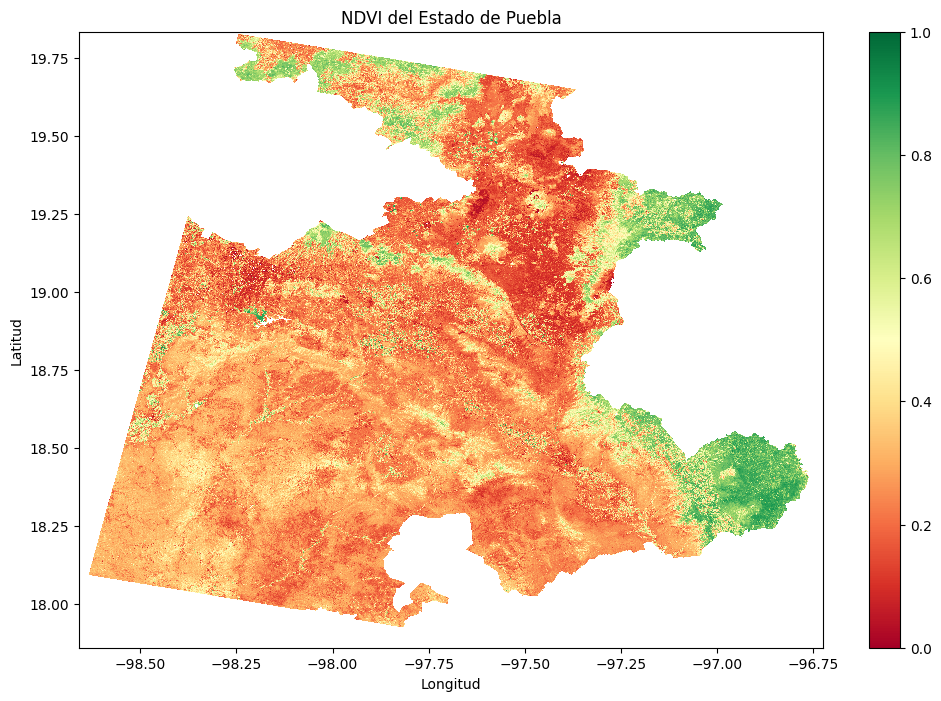

In [61]:
# Visualizar el NDVI de Puebla
plt.figure(figsize=(12, 8))
ndvi_puebla.plot(cmap='RdYlGn', vmin=0, vmax=1)
plt.title('NDVI del Estado de Puebla')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='NDVI')
plt.show()

In [62]:
# Exportar el NDVI de Puebla
ndvi_puebla.rio.to_raster('ndvi_puebla.tif')

In [53]:
# Ver el CRS del shapefile
entidades.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [54]:
# Reproyectar el shapefile al mismo CRS que el NDVI
entidades_reproj = entidades.to_crs(ndvi_4326.rio.crs)
entidades_reproj.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Hacer clip del NDVI con el shapefile de entidades
ndvi_clipped = ndvi_4326.rio.clip(entidades_reproj.geometry, entidades_reproj.crs)
ndvi_clipped